In [9]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from time import process_time
from typing import List 
from dataclasses import dataclass
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

In [10]:
x = sp.Symbol('x')
y = sp.lambdify(x, sp.diff(x*sp.exp(x), x))
y(1)

5.43656365691809

In [11]:
class Function:
    
    def __init__(self, f, g=None, h=None, symbol=False):
        if symbol == False:
            self.f = f
            self.g = g
            self.h = h
        elif symbol == True:
            x = sp.Symbol('x')
            self.f = sp.lambdify(x, f)
            self.g = sp.lambdify(x, f.diff(x))
            self.h = sp.lambdify(x, f.diff(x, 2))
        else:
            print("Error: incorrect usage")
    
    def calculate(self, x):
        return self.f(x)
    
    def gradient(self, x):
        return self.g(x)
    
    def hesse(self, x):
        return self.h(x)
    


In [12]:
@dataclass
class Result:
    point: float = None
    value: float = None
    solution_time: float = 0
    iteration_amount: float = None
    progress: List = None
    status: str = ''

    def print(self):
        print('Progress:\n')
        for i in range(self.iteration_amount + 1):
            print('It: {}, \t x = {:.3f}, f(x) = {:.5f}'.format(self.progress[i][0], self.progress[i][1], self.progress[i][2]))
        if self.status == 'Failure': 
            print('\nFailure: there is no convergence.')
        else:
            print('\nSolution: x = {:.3f}, f(x) = {:.3f}'.format(self.point, self.value))
            print('Time: {:.8f} s'.format(self.solution_time))


In [13]:
def armijo_line_search(f:Function, x):
    a = 0.5
    step = 1
    c = 1e-4
    p = - f.gradient(x)
    while not f.calculate(x + step * p) <= f.calculate(x) + c * step * f.gradient(x) * p:
        step *= a
    return step

In [81]:
def inexact_search(f:Function, a, b, tol:float, max_it=1000):
    start_time = process_time()
    res = Result()
    x = np.random.uniform(a, b)
    x_temp = 1e10
    p = -f.gradient(x)
    it = 0
    res.progress = []
    res.progress.append([it, x, f.calculate(x)])
    # print('It: {}, \t x = {:.3f}, f = {:.3f}'.format(it, x, f.calculate(x)))
    while np.abs(p) >= tol and it < max_it:
        step = armijo_line_search(f, x)
        x += step * p
        x = x if x >= a else a
        x = x if x <= b else b
        if x_temp == x:
            break
        x_temp = x
        p = -f.gradient(x)
        it += 1
        res.progress.append([it, x, f.calculate(x)])
        # print('It: {}, \t x = {:.3f}, f = {:.3f}'.format(it, x, f.calculate(x)))
    if it == max_it:
        res.status = 'Failure'
    else:
        # print('\nSolution: \t x = {:.3f}, f = {:.3f}'.format(x, f.calculate(x)))
        res.status = 'Success'
    res.point = x
    res.value = f.calculate(x)
    res.iteration_amount = it
    res.solution_time = process_time() - start_time
    return res

In [82]:
def plot_func(f:Function, x, a, b):
    i = np.linspace(a, b, 100)
    plt.plot(i, f.calculate(i))
    plt.plot(x, f.calculate(x), 'ro')
    plt.xlabel('$x$')
    plt.ylabel('$f(x)$')
    plt.title('Objective Function')

In [83]:
def plot_path(f:Function, a, b, res:Result):
    plot_func(f, res.progress[0][1], a, b)
    data = np.asarray(res.progress)
    plt.plot(data[:,1], data[:,2], linestyle='--', marker='o', color='orange')
    plt.plot(res.progress[0][1], res.progress[0][2], 'ro')

Progress:

It: 0, 	 x = 4.200, f(x) = 17.64091
It: 1, 	 x = 0.000, f(x) = 0.00000

Solution: x = 0.000, f(x) = 0.000
Time: 0.00007400 s


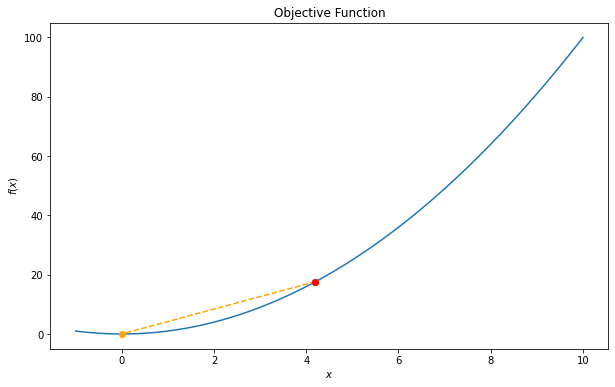

In [85]:
a = inexact_search(Function(x**2, symbol=True), -1, 10, 0.1)
a.print()
plot_path(Function(x**2, symbol=True), -1, 10, a)


Progress:

It: 0, 	 x = 0.977, f(x) = 1276.45016
It: 1, 	 x = -5.696, f(x) = 0.23499
It: 2, 	 x = -4.346, f(x) = 0.18271
It: 3, 	 x = -5.464, f(x) = 0.04637
It: 4, 	 x = -5.064, f(x) = 0.00002
It: 5, 	 x = -5.063, f(x) = 0.00002
It: 6, 	 x = -5.062, f(x) = 0.00002

Solution: x = -5.062, f(x) = 0.000
Time: 0.00009900 s


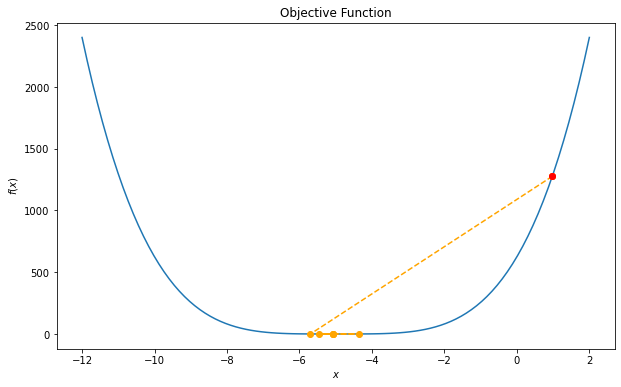

In [86]:
c = inexact_search(Function((x+5)**4, symbol=True), -6, 2, 0.001)
c.print()
plot_path(Function((x+5)**4, symbol=True), -12, 2, c)

Progress:

It: 0, 	 x = -0.095, f(x) = -0.08626
It: 1, 	 x = -0.918, f(x) = -0.36658
It: 2, 	 x = -0.951, f(x) = -0.36742
It: 3, 	 x = -0.970, f(x) = -0.36771
It: 4, 	 x = -0.981, f(x) = -0.36781
It: 5, 	 x = -0.988, f(x) = -0.36785
It: 6, 	 x = -0.993, f(x) = -0.36787
It: 7, 	 x = -0.995, f(x) = -0.36788
It: 8, 	 x = -0.997, f(x) = -0.36788
It: 9, 	 x = -0.998, f(x) = -0.36788

Solution: x = -0.998, f(x) = -0.368
Time: 0.00023900 s


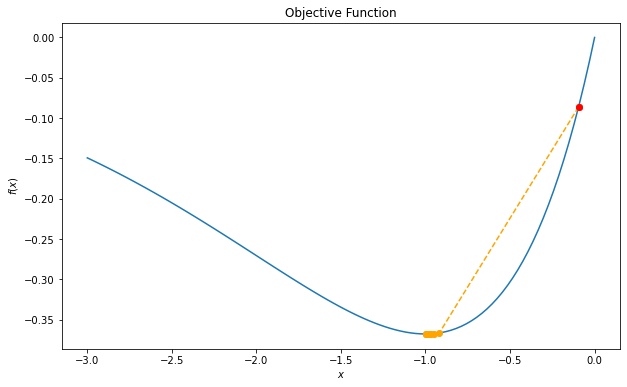

In [87]:
b = inexact_search(Function(x*sp.exp(x), symbol=True), -2, 0, 0.001)
b.print()
plot_path(Function(x*sp.exp(x), symbol=True), -3, 0, b)

Progress:

It: 0, 	 x = 0.966, f(x) = 0.36766
It: 1, 	 x = 0.953, f(x) = 0.36746
It: 2, 	 x = 0.935, f(x) = 0.36706
It: 3, 	 x = 0.909, f(x) = 0.36626
It: 4, 	 x = 0.872, f(x) = 0.36461
It: 5, 	 x = 0.819, f(x) = 0.36105
It: 6, 	 x = 0.739, f(x) = 0.35292
It: 7, 	 x = 0.614, f(x) = 0.33229
It: 8, 	 x = 0.405, f(x) = 0.27020
It: 9, 	 x = 0.009, f(x) = 0.00845
It: 10, 	 x = -0.975, f(x) = -2.58248
It: 11, 	 x = -2.000, f(x) = -14.77811

Solution: x = -2.000, f(x) = -14.778
Time: 0.00050400 s


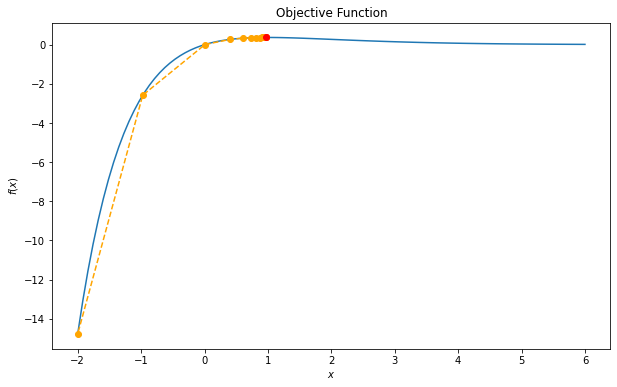

In [97]:
d = inexact_search(Function(x*sp.exp(-x), symbol=True), -2, 6, 0.01)
d.print()
plot_path(Function(x*sp.exp(-x), symbol=True), -2, 6, d)
